## Machine Learning

El objetivo es ajustar los parámetros de un modelo para que pueda hacer predicciones precisas basadas en datos de entrada. 
- Aprende patrones y relaciones a partir de datos históricos.
- Busca generalizar, es decir, funcionar bien en datos no vistos previamente.
- Se entrena minimizando una función de pérdida que mide el error entre las predicciones del modelo y los valores reales.

### Tipos de Machine Learning

- **Aprendizaje Supervisado**: El modelo se entrena con datos etiquetados, es decir, cada entrada tiene una salida conocida. Ejemplos incluyen clasificación y regresión.
- **Aprendizaje No Supervisado**: El modelo trabaja con datos no etiquetados y busca patrones o estructuras ocultas en los datos. Ejemplos incluyen clustering y reducción de dimensionalidad.
- **Aprendizaje por Refuerzo**: El modelo aprende a tomar decisiones mediante la interacción con un entorno, recibiendo recompensas o castigos según sus acciones.

Tambien tenemos que diferenciar entre:
- Classification: Cuando las salidas son categorías discretas.
- Regression: Cuando las salidas son valores continuos.
- Clustering: Agrupamiento de datos similares sin etiquetas predefinidas.
- Dimensionality Reduction: Reducción del número de variables en los datos manteniendo la mayor cantidad de información posible.

Pero claro si un modelo de clasificacion es demasiado grande puede ser tratado como un modelo de regresion.

### Pasos para desarrollar un modelo de Machine Learning

1. **Recolección de Datos**: Obtener un conjunto de datos relevante y representativo.
2. **Preprocesamiento de Datos**: Limpiar y transformar los datos para que sean adecuados para el entrenamiento del modelo.
3. **Selección del Modelo**: Elegir el algoritmo de Machine Learning adecuado según el problema y los datos.
4. **Entrenamiento del Modelo**: Ajustar los parámetros del modelo utilizando el conjunto de datos de entrenamiento.
5. **Evaluación del Modelo**: Medir el rendimiento del modelo utilizando un conjunto de datos de prueba y métricas adecuadas.
6. **Ajuste de Hiperparámetros**: Optimizar los hiperparámetros del modelo para mejorar su rendimiento.
7. **Despliegue del Modelo**: Implementar el modelo en un entorno de producción para hacer predicciones en tiempo real.
8. **Monitoreo y Mantenimiento**: Supervisar el rendimiento del modelo y actualizarlo según sea necesario para mantener su precisión.

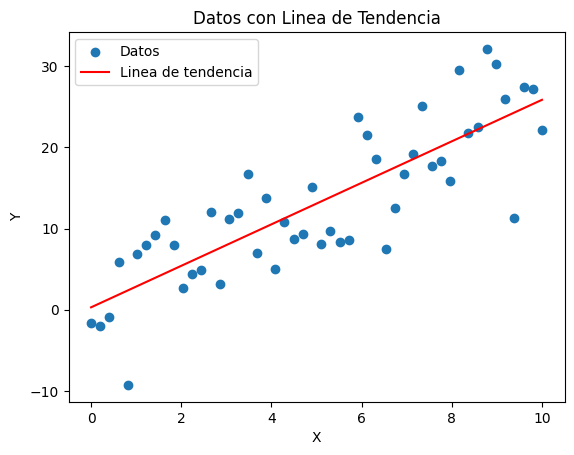

In [1]:
# vamos a simular datos
# conjunto de 50 datos aleatorios distribuidos linealmente (x,y) donde x es la variable independiente e y la dependiente

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2909)  # para reproducibilidad
x = np.linspace(0, 10, 50)
y = 2.5 * x + np.random.normal(0, 5, size
=x.shape)
# graficar los datos
# usar linea de tendencia
plt.scatter(x, y, label='Datos')
# ajustar una linea de tendencia
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label='Linea de tendencia')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos con Linea de Tendencia')
plt.legend()
plt.show()

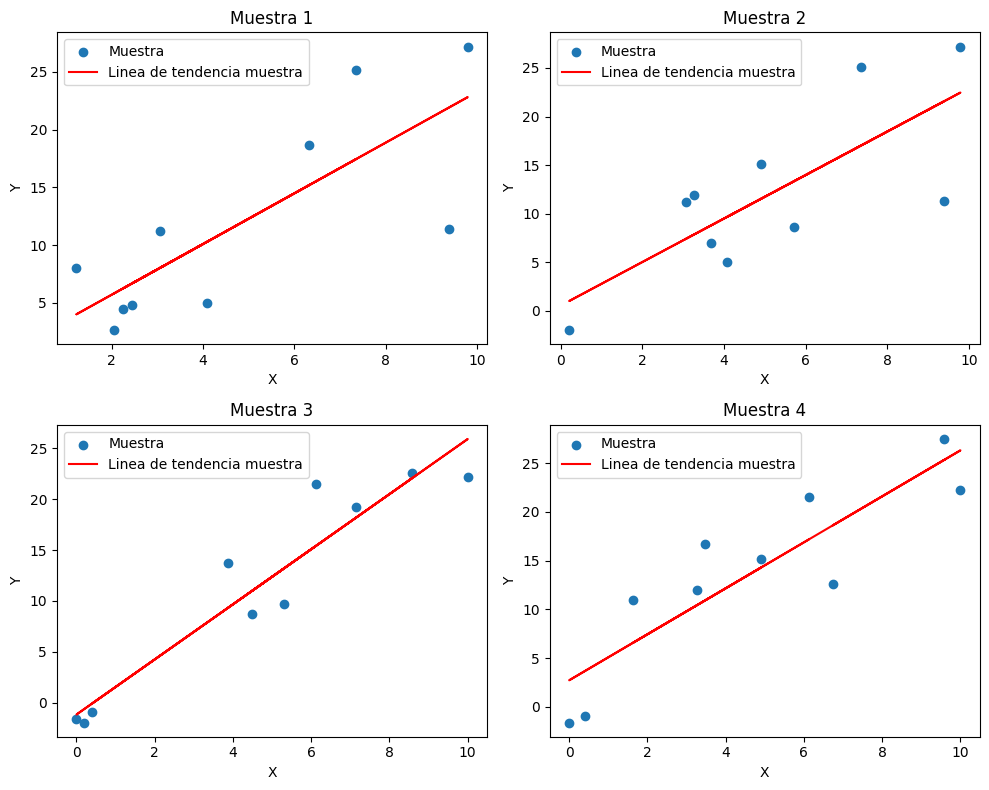

In [2]:
# vamos a tomar varias muestras de los datos y graficarlas en varias graficas
num_samples = 4
sample_size = 10
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i in range(num_samples):
    sample_indices = np.random.choice(len(x), size=sample_size, replace=False)
    x_sample = x[sample_indices]
    y_sample = y[sample_indices]
    ax = axs[i//2, i%2]
    ax.scatter(x_sample, y_sample, label='Muestra')
    m_s, b_s = np.polyfit(x_sample, y_sample, 1)
    ax.plot(x_sample, m_s*x_sample + b_s, color='red', label='Linea de tendencia muestra')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Muestra {i+1}')
    ax.legend()
plt.tight_layout()
plt.show()

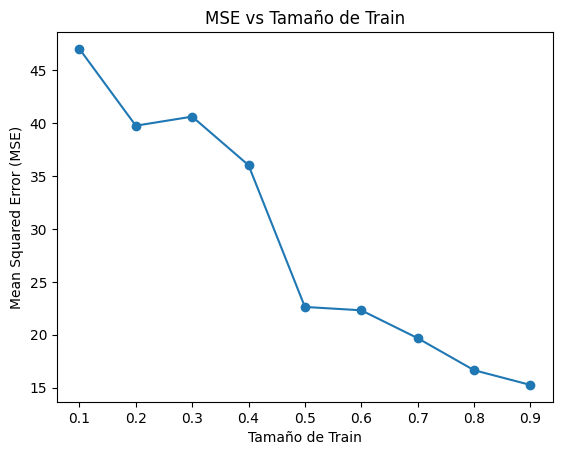

In [3]:
# hagamos un codigo para segmentar estos datos en train y test
# usamos train para hacer la regresion lineal y test para evaluar el modelo
# hagamos particiones de tamaño de train desde 10% hasta 90%.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
train_sizes = np.arange(0.1, 1.0, 0.1)
mse_values = []
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, train_size=train_size, random_state=2909)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
# graficar mse vs tamaño de train
plt.plot(train_sizes, mse_values, marker='o')
plt.xlabel('Tamaño de Train')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Tamaño de Train')
plt.show()


Cuando el MSE es mayor entonces el modelo es peor, cuando es menor el modelo es mejor, es decir en este caso queremos minimizar el MSE, asi que lo mejor es entrenarlo con la mayor cantidad de datos posibles para que el MSE sea lo mas bajo posible.

### Métricas para evaluar modelos de Machine Learning (con datos simulados)

Evaluar un modelo de machine learning es crucial para entender su rendimiento y capacidad de generalización. Aquí hay algunas métricas comunes utilizadas para evaluar modelos de aprendizaje supervisado, tanto para clasificación como para regresión:

#### Métricas de regresión

Estas metricas comparan valores reales con valores predichos.

##### Errores en escala original

- **Mean Absolute Error (MAE)**: Promedio de las diferencias absolutas entre los valores reales y los predichos. Es fácil de interpretar, ya que está en las mismas unidades que los datos.
  
  $$
  MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$

  *Interpretación*: Un MAE de 5 significa que, en promedio, las predicciones del modelo están a 5 unidades de distancia de los valores reales.

- **Mean Squared Error (MSE)**: Promedio de las diferencias al cuadrado entre los valores reales y los predichos. Penaliza más los errores grandes debido al cuadrado.
    $$
    MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
    $$
    *Interpretación*: Un MSE de 25 indica que, en promedio, el cuadrado de las diferencias entre las predicciones y los valores reales es 25.

- **Root Mean Squared Error (RMSE)**: Raíz cuadrada del MSE. Proporciona una medida de error en las mismas unidades que los datos originales.
    $$
    RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
    $$
    *Interpretación*: Un RMSE de 5 indica que, en promedio, las predicciones del modelo están a 5 unidades de distancia de los valores reales.


##### Errores en escala relativa y de ajuste

- **Mean Absolute Percentage Error (MAPE)**: Promedio de los errores absolutos expresados como un porcentaje de los valores reales. Es útil para entender el error en términos relativos.
    $$
    MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
    $$
    *Interpretación*: Un MAPE del 10% significa que, en promedio, las predicciones del modelo están a un 10% de distancia de los valores reales.

- **R-squared (R²)**: Mide la proporción de la varianza en los datos que es explicada por el modelo. Varía entre 0 y 1, donde 1 indica un ajuste perfecto.
    $$
    R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
    $$
    *Interpretación*: Un R² de 0.85 indica que el 85% de la varianza en los datos es explicada por el modelo.

#### Robustas a outliers

- **Median Absolute Error (MedAE)**: Mediana de las diferencias absolutas entre los valores reales y los predichos. Es menos sensible a outliers que el MAE.
    $$
    MedAE = median(|y_i - \hat{y}_i|)
    $$
    *Interpretación*: Un MedAE de 4 significa que la mediana de las diferencias absolutas entre las predicciones y los valores reales es 4 unidades.

### Métricas de clasificación

En clasificacion hay dos niveles:
- **Etiquetas predichas**: Se comparan las etiquetas predichas con las etiquetas reales.
- **Probabilidades predichas**: Se comparan las probabilidades asignadas a cada clase con las etiquetas reales.

#### Métricas basadas en la matriz de confusión
Estas metricas se basan en la matriz de confusión que compara las predicciones del modelo con las etiquetas reales.
- **Accuracy**: Proporción de predicciones correctas sobre el total de predicciones.
    $$
    Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
    $$
    *Interpretación*: Un accuracy del 90% significa que el modelo predijo correctamente el 90% de las veces.

- **Precision**: Proporción de verdaderos positivos sobre el total de positivos predichos.
    $$
    Precision = \frac{TP}{TP + FP}
    $$
    *Interpretación*: Una precision del 80% significa que el 80% de las veces que el modelo predijo positivo, fue correcto.

- **Recall (Sensibilidad)**: Proporción de verdaderos positivos sobre el total de positivos reales.
    $$
    Recall = \frac{TP}{TP + FN}
    $$
    *Interpretación*: Un recall del 70% significa que el modelo identificó correctamente el 70% de los casos positivos reales.

- **F1-Score**: Media armónica de precision y recall, útil cuando hay un desequilibrio entre clases.
    $$
    F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
    $$
    *Interpretación*: Un F1-score del 75% indica un buen equilibrio entre precision y recall.

- **Balanced Accuracy**: Promedio del recall para cada clase, útil en conjuntos de datos desequilibrados.
    $$
    Balanced\ Accuracy = \frac{1}{C} \sum_{i=1}^{C} \frac{TP_i}{TP_i + FN_i}
    $$
    *Interpretación*: Un balanced accuracy del 85% indica que, en promedio, el modelo tiene un buen rendimiento en todas las clases.

#### Métricas basadas en probabilidades
Estas metricas evalúan la calidad de las probabilidades predichas por el modelo.

- **Log Loss (Cross-Entropy Loss)**: Mide la incertidumbre de las predicciones basadas en las probabilidades asignadas a cada clase. Penaliza fuertemente las predicciones incorrectas con alta confianza.
    $$
    Log\ Loss = -\frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{i,c} \log(\hat{p}_{i,c})
    $$
    *Interpretación*: Un log loss más bajo indica mejores predicciones de probabilidad.

- **Area Under the ROC Curve (AUC-ROC)**: Mide la capacidad del modelo para distinguir entre clases. Un valor de 1 indica un modelo perfecto, mientras que 0.5 indica un modelo sin capacidad discriminativa.

    $$
    AUC-ROC = \int_{0}^{1} TPR(FPR) dFPR
    $$
    *Interpretación*: Un AUC-ROC de 0.9 indica que el modelo tiene una alta capacidad para distinguir entre clases positivas y negativas.

#### Multiclase y multilabel
- Para problemas multiclase y multilabel, las métricas como precision, recall y F1-score se pueden calcular utilizando enfoques "macro", "micro" o "weighted" para obtener una visión más completa del rendimiento del modelo.

### Métricas de Calibración

Las metricas de calibracion es cuando importan las probabilidades predichas y no solo las etiquetas. Estas metricas evalúan qué tan bien las probabilidades predichas por un modelo reflejan las verdaderas probabilidades observadas.

- **Brier Score**: Mide la precisión de las probabilidades predichas. Es la media del cuadrado de las diferencias entre las probabilidades predichas y los resultados reales (0 o 1).
    $$
    Brier\ Score = \frac{1}{n} \sum_{i=1}^{n} (\hat{p}_i - y_i)^2
    $$
    *Interpretación*: Un Brier Score más bajo indica mejores probabilidades predichas.
- **Calibration Curve**: Gráfico que compara las probabilidades predichas con las frecuencias observadas. Una curva cercana a la diagonal indica un buen calibrado.
- **Expected Calibration Error (ECE)**: Mide la diferencia promedio entre las probabilidades pred
ichas y las frecuencias observadas en diferentes intervalos de probabilidad.
    $$
    ECE = \sum_{m=1}^{M} \frac{|B_m|}{n} |acc(B_m) - conf(B_m)|
    $$
    *Interpretación*: Un ECE más bajo indica un mejor calibrado del modelo.idas y las frecuencias observadas en diferentes intervalos de probabilidad.

### Métricas de clustering

Clusterin no supervisado si no hay etiquetas reales. Estas metricas evalúan la calidad de los clusters formados por el modelo.

- **Silhouette Score**: Mide qué tan similares son los puntos dentro de un cluster en comparación con puntos de otros clusters. Varía entre -1 y 1, donde valores cercanos a 1 indican clusters bien definidos.
    $$
    Silhouette\ Score = \frac{b(i) - a(i)}{max(a(i), b(i))}
    $$
    *Interpretación*: Un Silhouette Score de 0.7 indica que los clusters están bien separados.

- **Davies-Bouldin Index**: Mide la relación entre la dispersión dentro de los clusters y la distancia entre los clusters. Valores más bajos indican mejores clusters.
    $$
    DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)
    $$
    *Interpretación*: Un Davies-Bouldin Index de 0.5 indica que los clusters están bien definidos y separados.

### ¿Cómo elegir la métrica adecuada?

La elección de la métrica adecuada depende del tipo de problema, los objetivos del modelo y las características de los datos. Es importante considerar múltiples métricas para obtener una visión completa del rendimiento del modelo.
- Si el error se mide en unidades originales, MAE y RMSE son útiles.
- Si se desea entender el error en términos relativos, MAPE es adecuado.
- Para problemas de clasificación con clases desbalanceadas, F1-score y balanced accuracy son preferibles.
- Para evaluar la calidad de las probabilidades predichas, Log Loss y AUC-ROC son recomendables.
- Si el costo de errores es explícito, se deben considerar métricas que reflejen estos costos.

### Buenas prácticas mínimas

- Reportar métricas en **test** y no en train.
- Usar **validación cruzada** para obtener estimaciones más robustas del rendimiento del modelo.
- Comparar múltiples métricas para obtener una visión completa del rendimiento del modelo.
- Evitar **data leakage** asegurándose de que la información del conjunto de prueba no influya en el entrenamiento del modelo para evaluar modelos de Machine Learning (con datos simulados)


### Simulación + Evaluación de Métricas (regresión y clasificación)

Vamos a simular datos para un problema de regresión y otro de clasificación, entrenar modelos simples y evaluar su rendimiento utilizando las métricas mencionadas anteriormente.